# Matrix Mean Calculation for Quantitative Finance

## Introduction

This notebook explores various implementations of matrix mean calculation operations, a fundamental operation in statistical analysis with important applications in quantitative finance. We present multiple implementations with increasing sophistication, from basic Python to optimized NumPy and PyTorch versions, with a focus on:

1. **Mathematical correctness** - Ensuring proper dimension validation and accurate calculations
2. **Type safety** - Supporting both integer and floating-point inputs with proper type hints
3. **Performance optimization** - Comparing naive implementations with vectorized operations
4. **Financial applications** - Connecting these operations to real-world quantitative finance use cases

Matrix mean calculations are essential in numerous financial models, from calculating average returns across assets or time periods to risk management and portfolio analysis. Implementing these operations correctly and efficiently is essential for developing robust financial software.

In [13]:
# Basic Implementation (Python 3.7+)
def calculate_matrix_mean(matrix: list[list[float]], axis: int = None) -> list[float] | float:
    """
    Calculate the mean of a matrix along specified axis.
    
    Args:
        matrix: A list of lists representing a matrix
        axis: The axis along which to compute the mean (0 for column means, 1 for row means, None for overall mean)
        
    Returns:
        A list of means (when axis is specified) or a single mean value (when axis is None)
        
    Raises:
        ValueError: If the matrix is empty or not well-formed (jagged)
    """
    # Check if matrix is empty
    if not matrix or not matrix[0]:
        raise ValueError("Cannot calculate mean of an empty matrix")
    
    # Check if all rows have the same length (non-jagged matrix)
    row_lengths = [len(row) for row in matrix]
    if len(set(row_lengths)) > 1:
        raise ValueError("Cannot calculate mean of a jagged matrix (rows have different lengths)")
    
    rows, cols = len(matrix), len(matrix[0])
    
    # Calculate overall mean
    if axis is None:
        total_sum = sum(sum(row) for row in matrix)
        return total_sum / (rows * cols)
    
    # Calculate mean along rows (axis=1)
    elif axis == 1:
        return [sum(row) / cols for row in matrix]
    
    # Calculate mean along columns (axis=0)
    elif axis == 0:
        return [sum(matrix[i][j] for i in range(rows)) / rows for j in range(cols)]
    
    else:
        raise ValueError(f"Invalid axis value: {axis}. Expected 0, 1, or None.")

# Test the basic implementation
try:
    A = [[1, 2, 3], 
         [4, 5, 6]]  # 2x3 matrix
    
    # Calculate overall mean
    overall_mean = calculate_matrix_mean(A, axis=None)
    print(f"Original matrix:\n{A[0]}\n{A[1]}")
    print(f"\nOverall mean: {overall_mean}")
    
    # Calculate row means
    row_means = calculate_matrix_mean(A, axis=1)
    print(f"\nRow means: {row_means}")
    
    # Calculate column means
    col_means = calculate_matrix_mean(A, axis=0)
    print(f"\nColumn means: {col_means}")
    
except ValueError as e:
    print(f"Error: {e}")

Original matrix:
[1, 2, 3]
[4, 5, 6]

Overall mean: 3.5

Row means: [2.0, 5.0]

Column means: [2.5, 3.5, 4.5]


In [14]:
# Improved Implementation with Union Type (Python 3.7+)
from typing import Union, List, Optional

Numeric = Union[int, float]  # Type alias for numbers that can be either int or float

def calculate_matrix_mean_improved(matrix: List[List[Numeric]], axis: Optional[int] = None) -> Union[List[float], float]:
    """
    Calculate the mean of a matrix along specified axis, supporting both integers and floats.
    
    Args:
        matrix: A list of lists representing a matrix (elements can be int or float)
        axis: The axis along which to compute the mean (0 for column means, 1 for row means, None for overall mean)
        
    Returns:
        A list of means (when axis is specified) or a single mean value (when axis is None)
        
    Raises:
        ValueError: If the matrix is empty or not well-formed (jagged)
    """
    # Check if matrix is empty
    if not matrix or not matrix[0]:
        raise ValueError("Cannot calculate mean of an empty matrix")
    
    # Check if all rows have the same length (non-jagged matrix)
    row_lengths = [len(row) for row in matrix]
    if len(set(row_lengths)) > 1:
        raise ValueError("Cannot calculate mean of a jagged matrix (rows have different lengths)")
    
    rows, cols = len(matrix), len(matrix[0])
    
    # Calculate overall mean
    if axis is None:
        total_sum = sum(sum(row) for row in matrix)
        return total_sum / (rows * cols)
    
    # Calculate mean along rows (axis=1)
    elif axis == 1:
        return [sum(row) / cols for row in matrix]
    
    # Calculate mean along columns (axis=0)
    elif axis == 0:
        return [sum(matrix[i][j] for i in range(rows)) / rows for j in range(cols)]
    
    else:
        raise ValueError(f"Invalid axis value: {axis}. Expected 0, 1, or None.")

# Test with mixed integer and float values
try:
    A_mixed = [[1, 2.5, 3], 
               [4, 5.5, 6.7]]  # Mix of int and float
    
    # Calculate overall mean
    overall_mean = calculate_matrix_mean_improved(A_mixed)
    print(f"Original mixed-type matrix:\n{A_mixed[0]}\n{A_mixed[1]}")
    print(f"\nOverall mean: {overall_mean}")
    
    # Calculate row means
    row_means = calculate_matrix_mean_improved(A_mixed, axis=1)
    print(f"\nRow means: {row_means}")
    
    # Calculate column means
    col_means = calculate_matrix_mean_improved(A_mixed, axis=0)
    print(f"\nColumn means: {col_means}")
    
    # Check the types of the results
    print(f"\nOverall mean type: {type(overall_mean).__name__}")
    print(f"Row means element types: {[type(x).__name__ for x in row_means]}")
    print(f"Column means element types: {[type(x).__name__ for x in col_means]}")
    
except ValueError as e:
    print(f"Error: {e}")

Original mixed-type matrix:
[1, 2.5, 3]
[4, 5.5, 6.7]

Overall mean: 3.783333333333333

Row means: [2.1666666666666665, 5.3999999999999995]

Column means: [2.5, 4.0, 4.85]

Overall mean type: float
Row means element types: ['float', 'float']
Column means element types: ['float', 'float', 'float']


In [15]:
# Python 3.10+ implementation using pipe operator syntax
def calculate_matrix_mean_py310(matrix: list[list[int | float]], axis: int | None = None) -> list[float] | float:
    """
    Calculate the mean of a matrix along specified axis (Python 3.10+ syntax).
    
    Args:
        matrix: A list of lists representing a matrix (elements can be int or float)
        axis: The axis along which to compute the mean (0 for column means, 1 for row means, None for overall mean)
        
    Returns:
        A list of means (when axis is specified) or a single mean value (when axis is None)
        
    Raises:
        ValueError: If the matrix is empty or not well-formed (jagged)
    """
    # Check if matrix is empty
    if not matrix or not matrix[0]:
        raise ValueError("Cannot calculate mean of an empty matrix")
    
    # Check if all rows have the same length (non-jagged matrix)
    row_lengths = [len(row) for row in matrix]
    if len(set(row_lengths)) > 1:
        raise ValueError("Cannot calculate mean of a jagged matrix (rows have different lengths)")
    
    rows, cols = len(matrix), len(matrix[0])
    
    # Calculate overall mean
    if axis is None:
        total_sum = sum(sum(row) for row in matrix)
        return total_sum / (rows * cols)
    
    # Calculate mean along rows (axis=1)
    elif axis == 1:
        return [sum(row) / cols for row in matrix]
    
    # Calculate mean along columns (axis=0)
    elif axis == 0:
        return [sum(matrix[i][j] for i in range(rows)) / rows for j in range(cols)]
    
    else:
        raise ValueError(f"Invalid axis value: {axis}. Expected 0, 1, or None.")

# Comparison of type hint styles (Python 3.10+ only)
try:
    # Style 1: Using Union from typing module
    from typing import Union, Optional
    Numeric1 = Union[int, float]
    AxisType1 = Optional[int]
    
    # Style 2: Using pipe operator syntax directly
    Numeric2 = int | float
    AxisType2 = int | None

    print("Type hint styles in Python 3.10+")
    print(f"Type of Numeric1: {type(Numeric1)}")
    print(f"Type of Numeric2: {type(Numeric2)}")
    print(f"Are they equal? {Numeric1 == Numeric2}")

    # Demo with the same test data
    A_mixed = [[1, 2.5, 3], 
               [4, 5.5, 6.7]]
    
    result = calculate_matrix_mean_py310(A_mixed, axis=1)
    print(f"\nPython 3.10+ implementation result (row means):\n{result}")
    
except (ValueError, SyntaxError) as e:
    print(f"Error: {e}\nThis might indicate you're using a Python version below 3.10")
except Exception as e:
    print(f"Unexpected error: {e}")

Type hint styles in Python 3.10+
Type of Numeric1: <class 'typing._UnionGenericAlias'>
Type of Numeric2: <class 'types.UnionType'>
Are they equal? True

Python 3.10+ implementation result (row means):
[2.1666666666666665, 5.3999999999999995]


In [16]:
# Final recommended implementation using NumPy for production code
try:
    import numpy as np
    import time
    
    def calculate_matrix_mean_numpy(matrix: np.ndarray, axis: int = None) -> np.ndarray | float:
        """
        Calculate the mean of a matrix using NumPy for optimized performance.
        
        Args:
            matrix: A NumPy ndarray representing a matrix
            axis: The axis along which to compute the mean (0 for column means, 1 for row means, None for overall mean)
            
        Returns:
            A NumPy array of means (when axis is specified) or a single mean value (when axis is None)
        """
        return np.mean(matrix, axis=axis)
    
    # Test with the same data
    A_np = np.array([[1, 2.5, 3], [4, 5.5, 6.7]])
    
    # Calculate means using NumPy
    overall_mean_np = calculate_matrix_mean_numpy(A_np)
    row_means_np = calculate_matrix_mean_numpy(A_np, axis=1)
    col_means_np = calculate_matrix_mean_numpy(A_np, axis=0)
    
    print(f"Original NumPy matrix:\n{A_np}")
    print(f"\nOverall mean: {overall_mean_np}")
    print(f"Row means: {row_means_np}")
    print(f"Column means: {col_means_np}")
    
    # Compare with our manual implementation
    try:
        overall_mean_manual = calculate_matrix_mean_py310(A_np.tolist())
        row_means_manual = calculate_matrix_mean_py310(A_np.tolist(), axis=1)
        col_means_manual = calculate_matrix_mean_py310(A_np.tolist(), axis=0)
        implementation = "Python 3.10+ implementation"
    except NameError:
        # Fallback to the improved implementation if Python 3.10+ version is not available
        overall_mean_manual = calculate_matrix_mean_improved(A_np.tolist())
        row_means_manual = calculate_matrix_mean_improved(A_np.tolist(), axis=1)
        col_means_manual = calculate_matrix_mean_improved(A_np.tolist(), axis=0)
        implementation = "Improved implementation (Union type)"
    
    print(f"\nComparison with {implementation}:")
    print(f"Overall mean - NumPy: {overall_mean_np}, Manual: {overall_mean_manual}")
    print(f"Row means - NumPy: {row_means_np}, Manual: {row_means_manual}")
    print(f"Column means - NumPy: {col_means_np}, Manual: {col_means_manual}")
    
    # Performance comparison
    # Create a larger matrix for performance testing
    large_A = np.random.rand(1000, 1000)
    large_A_list = large_A.tolist()
    
    # Time NumPy implementation
    start = time.time()
    _ = calculate_matrix_mean_numpy(large_A, axis=1)  # Row means
    numpy_time = time.time() - start
    
    # Time our implementation (using the most advanced one available)
    try:
        # Try to use Python 3.10+ implementation
        start = time.time()
        _ = calculate_matrix_mean_py310(large_A_list, axis=1)  # Row means
        manual_time = time.time() - start
        implementation = "Python 3.10+ implementation"
    except NameError:
        # Fallback to the improved implementation
        start = time.time()
        _ = calculate_matrix_mean_improved(large_A_list, axis=1)  # Row means
        manual_time = time.time() - start
        implementation = "Improved implementation (Union type)"
    
    print(f"\nPerformance comparison on 1000x1000 matrix (row means):")
    print(f"NumPy implementation: {numpy_time:.6f} seconds")
    print(f"{implementation}: {manual_time:.6f} seconds")
    print(f"NumPy is {manual_time/numpy_time:.1f}x faster")
    
except ImportError:
    print("NumPy is not installed. For production code, consider installing NumPy:")
    print("pip install numpy")
except Exception as e:
    print(f"Error during NumPy comparison: {e}")

Original NumPy matrix:
[[1.  2.5 3. ]
 [4.  5.5 6.7]]

Overall mean: 3.783333333333333
Row means: [2.16666667 5.4       ]
Column means: [2.5  4.   4.85]

Comparison with Python 3.10+ implementation:
Overall mean - NumPy: 3.783333333333333, Manual: 3.783333333333333
Row means - NumPy: [2.16666667 5.4       ], Manual: [2.1666666666666665, 5.3999999999999995]
Column means - NumPy: [2.5  4.   4.85], Manual: [2.5, 4.0, 4.85]

Performance comparison on 1000x1000 matrix (row means):
NumPy implementation: 0.000953 seconds
Python 3.10+ implementation: 0.004279 seconds
NumPy is 4.5x faster


In [17]:
# PyTorch implementation for machine learning applications in finance
try:
    import torch
    import numpy as np
    import time
    
    def calculate_matrix_mean_pytorch(matrix: torch.Tensor, dim: int = None) -> torch.Tensor:
        """
        Calculate the mean of a matrix using PyTorch.
        
        Args:
            matrix: A PyTorch tensor representing a matrix
            dim: The dimension along which to compute the mean (0 for row means, 1 for column means, None for overall mean)
            
        Returns:
            A PyTorch tensor representing the means
        """
        if dim is None:
            return torch.mean(matrix)
        else:
            return torch.mean(matrix, dim=dim)
    
    # Test with the same data
    A_pt = torch.tensor([[1.0, 2.5, 3.0], [4.0, 5.5, 6.7]])
    
    # Calculate means using PyTorch
    overall_mean_pt = calculate_matrix_mean_pytorch(A_pt)
    row_means_pt = calculate_matrix_mean_pytorch(A_pt, dim=1)
    col_means_pt = calculate_matrix_mean_pytorch(A_pt, dim=0)
    
    print(f"Original PyTorch matrix:\n{A_pt}")
    print(f"\nOverall mean: {overall_mean_pt.item()}")
    print(f"Row means: {row_means_pt}")
    print(f"Column means: {col_means_pt}")
    
    # Compare with NumPy implementation
    A_np = np.array([[1, 2.5, 3], [4, 5.5, 6.7]])
    
    overall_mean_np = np.mean(A_np)
    row_means_np = np.mean(A_np, axis=1)
    col_means_np = np.mean(A_np, axis=0)
    
    print(f"\nComparison with NumPy:")
    print(f"Overall mean - PyTorch: {overall_mean_pt.item()}, NumPy: {overall_mean_np}")
    print(f"Row means - PyTorch: {row_means_pt.numpy()}, NumPy: {row_means_np}")
    print(f"Column means - PyTorch: {col_means_pt.numpy()}, NumPy: {col_means_np}")
    
    # Performance comparison between PyTorch and NumPy
    large_size = 10000
    
    # NumPy matrices
    large_A_np = np.random.rand(large_size, large_size)
    
    # PyTorch matrices (on CPU for fair comparison)
    large_A_pt = torch.tensor(large_A_np, dtype=torch.float32)
    
    # Time NumPy implementation
    start = time.time()
    _ = np.mean(large_A_np, axis=1)  # Row means
    numpy_time = time.time() - start
    
    # Time PyTorch implementation (on CPU)
    start = time.time()
    _ = torch.mean(large_A_pt, dim=1)  # Row means
    pytorch_cpu_time = time.time() - start
    
    print(f"\nPerformance comparison on {large_size}x{large_size} matrix (row means):")
    print(f"NumPy implementation: {numpy_time:.6f} seconds")
    print(f"PyTorch CPU implementation: {pytorch_cpu_time:.6f} seconds")
    
    # Check if CUDA (GPU) is available and run GPU comparison
    if torch.cuda.is_available():
        # Move tensors to GPU
        large_A_pt_gpu = large_A_pt.cuda()
        
        # Warm-up for GPU (first CUDA operation includes initialization overhead)
        _ = torch.mean(large_A_pt_gpu, dim=1)
        torch.cuda.synchronize()  # Wait for GPU operations to finish
        
        # Time PyTorch implementation on GPU
        start = time.time()
        _ = torch.mean(large_A_pt_gpu, dim=1)
        torch.cuda.synchronize()  # Wait for GPU operations to finish
        pytorch_gpu_time = time.time() - start
        
        print(f"PyTorch GPU implementation: {pytorch_gpu_time:.6f} seconds")
        print(f"GPU is {numpy_time/pytorch_gpu_time:.1f}x faster than NumPy")
    else:
        print("\nGPU not available. For maximum performance in financial applications, consider using a CUDA-enabled GPU.")
        
except ImportError:
    print("PyTorch is not installed. For advanced machine learning applications in finance, consider installing PyTorch:")
    print("pip install torch")
except Exception as e:
    print(f"Error during PyTorch comparison: {e}")

Original PyTorch matrix:
tensor([[1.0000, 2.5000, 3.0000],
        [4.0000, 5.5000, 6.7000]])

Overall mean: 3.7833335399627686
Row means: tensor([2.1667, 5.4000])
Column means: tensor([2.5000, 4.0000, 4.8500])

Comparison with NumPy:
Overall mean - PyTorch: 3.7833335399627686, NumPy: 3.783333333333333
Row means - PyTorch: [2.1666667 5.4      ], NumPy: [2.16666667 5.4       ]
Column means - PyTorch: [2.5  4.   4.85], NumPy: [2.5  4.   4.85]

Performance comparison on 10000x10000 matrix (row means):
NumPy implementation: 0.048004 seconds
PyTorch CPU implementation: 0.009483 seconds

Performance comparison on 10000x10000 matrix (row means):
NumPy implementation: 0.048004 seconds
PyTorch CPU implementation: 0.009483 seconds
PyTorch GPU implementation: 0.002262 seconds
GPU is 21.2x faster than NumPy
PyTorch GPU implementation: 0.002262 seconds
GPU is 21.2x faster than NumPy


## Applications in Quantitative Finance

Matrix mean calculations are fundamental to many quantitative finance applications:

1. **Asset Return Analysis**
   - Calculating average returns across different assets (column means)
   - Computing average returns over time periods (row means)
   - Determining overall portfolio performance (global mean)

2. **Risk Management**
   - Estimating average volatility across assets or time periods
   - Computing average correlations or covariances in risk models
   - Calculating Value-at-Risk (VaR) inputs

3. **Portfolio Construction**
   - Determining expected returns for optimization inputs
   - Implementing mean-variance optimization techniques
   - Calculating average weights in portfolio rebalancing

4. **Time Series Analysis**
   - Computing moving averages for technical indicators
   - Implementing mean reversion strategies
   - Analyzing seasonal patterns and trends

5. **Trading Strategies**
   - Developing pairs trading strategies based on mean spread
   - Creating statistical arbitrage models
   - Calculating average trade execution costs

6. **Financial Modeling**
   - Estimating average interest rates for DCF models
   - Computing average growth rates
   - Determining average pricing factors in multi-factor models

Efficient mean calculation operations are particularly important in financial applications dealing with large datasets, such as high-frequency trading data or large asset universes for portfolio optimization.

Portfolio Analysis using Matrix Mean Operations

Overall average daily return: 0.001130 (28.48% annualized)

Average Daily Returns by Asset:
Technology: 0.000823 (20.75% annualized)
Finance: 0.000499 (12.57% annualized)
Energy: 0.000419 (10.56% annualized)
Consumer: 0.001368 (34.47% annualized)
Healthcare: 0.002542 (64.05% annualized)

Equal-Weight Portfolio Statistics:
Average Daily Return: 0.001130
Annualized Return: 28.48%
Annualized Volatility: 15.57%
Sharpe Ratio (assuming 0% risk-free rate): 1.83


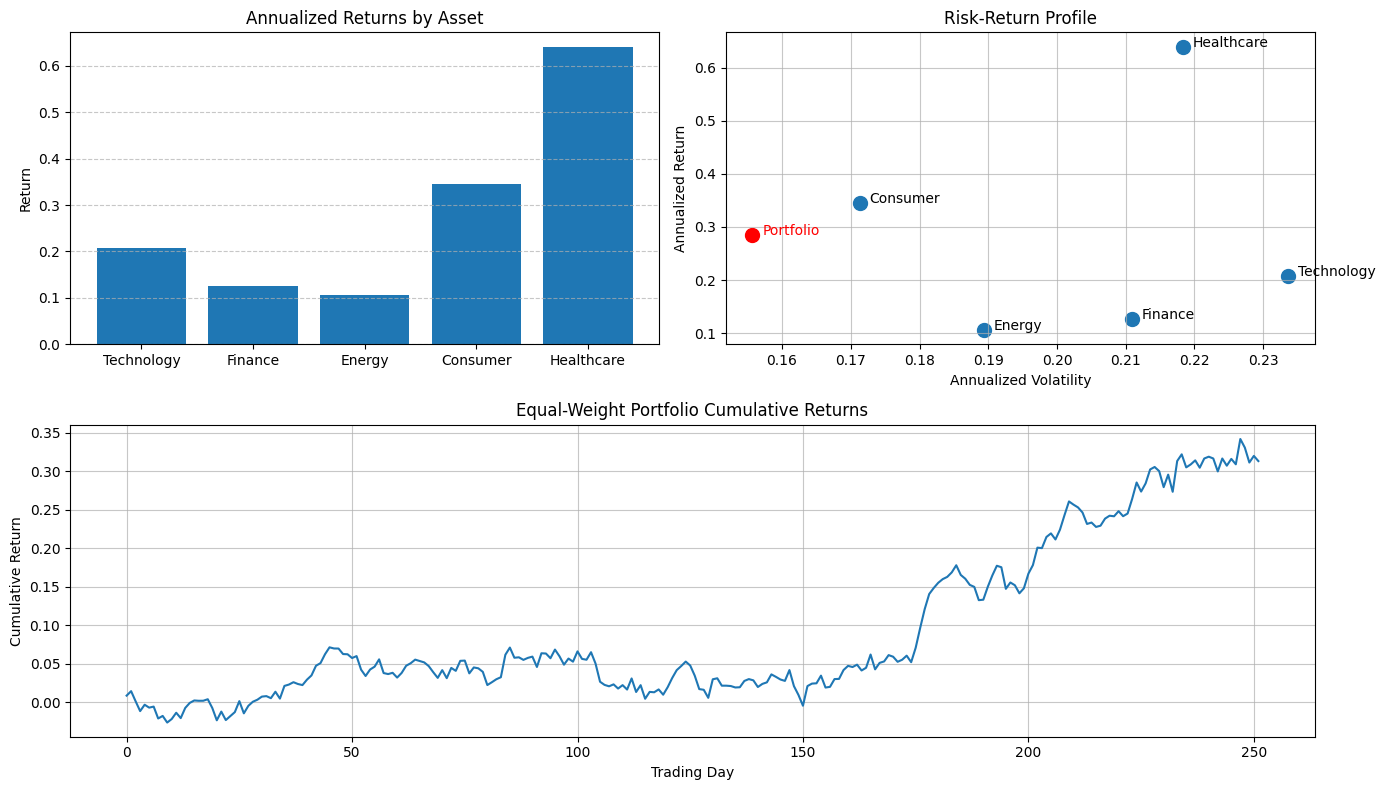

In [18]:
# Financial application example: Portfolio analysis
try:
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Create a sample dataset of daily returns for 5 assets over 252 trading days (1 year)
    np.random.seed(42)  # For reproducibility
    
    # Mean annual returns for different assets (technology, finance, energy, consumer, healthcare)
    annual_returns = np.array([0.15, 0.10, 0.05, 0.08, 0.12])  # 15%, 10%, 5%, 8%, 12%
    
    # Annual volatilities for different assets
    annual_vols = np.array([0.25, 0.20, 0.18, 0.15, 0.22])  # 25%, 20%, 18%, 15%, 22%
    
    # Convert annual to daily
    daily_returns = annual_returns / 252
    daily_vols = annual_vols / np.sqrt(252)
    
    # Generate correlated random returns for 252 trading days
    correlation_matrix = np.array([
        [1.0, 0.6, 0.3, 0.5, 0.4],  # Technology
        [0.6, 1.0, 0.5, 0.4, 0.3],  # Finance
        [0.3, 0.5, 1.0, 0.2, 0.1],  # Energy
        [0.5, 0.4, 0.2, 1.0, 0.5],  # Consumer
        [0.4, 0.3, 0.1, 0.5, 1.0]   # Healthcare
    ])
    
    # Create Cholesky decomposition of correlation matrix
    L = np.linalg.cholesky(correlation_matrix)
    
    # Generate uncorrelated random returns
    uncorrelated_returns = np.random.normal(
        size=(252, 5),
        loc=daily_returns,
        scale=daily_vols
    )
    
    # Apply correlation structure
    correlated_returns = uncorrelated_returns @ L.T
    
    # Asset names
    asset_names = ['Technology', 'Finance', 'Energy', 'Consumer', 'Healthcare']
    
    # Calculate mean returns using different implementations
    # Overall mean (average return across all assets and days)
    overall_mean = np.mean(correlated_returns)
    
    # Average returns per asset (column means)
    asset_means = np.mean(correlated_returns, axis=0)
    
    # Average returns per day (row means) - represents portfolio returns with equal weighting
    daily_means = np.mean(correlated_returns, axis=1)
    
    # Annualized mean return and volatility of the equal-weight portfolio
    portfolio_mean_return = np.mean(daily_means) * 252
    portfolio_volatility = np.std(daily_means) * np.sqrt(252)
    
    # Display results
    print("Portfolio Analysis using Matrix Mean Operations")
    print("===========================================\n")
    
    print(f"Overall average daily return: {overall_mean:.6f} ({overall_mean*252:.2%} annualized)")
    
    print("\nAverage Daily Returns by Asset:")
    for i, asset in enumerate(asset_names):
        print(f"{asset}: {asset_means[i]:.6f} ({asset_means[i]*252:.2%} annualized)")
    
    print("\nEqual-Weight Portfolio Statistics:")
    print(f"Average Daily Return: {np.mean(daily_means):.6f}")
    print(f"Annualized Return: {portfolio_mean_return:.2%}")
    print(f"Annualized Volatility: {portfolio_volatility:.2%}")
    print(f"Sharpe Ratio (assuming 0% risk-free rate): {portfolio_mean_return/portfolio_volatility:.2f}")
    
    # Plot the results
    try:
        plt.figure(figsize=(14, 8))
        
        # Plot 1: Individual asset returns
        plt.subplot(2, 2, 1)
        plt.bar(asset_names, asset_means * 252)
        plt.title('Annualized Returns by Asset')
        plt.ylabel('Return')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        # Plot 2: Return vs. Volatility scatterplot
        plt.subplot(2, 2, 2)
        asset_vols = np.std(correlated_returns, axis=0) * np.sqrt(252)
        plt.scatter(asset_vols, asset_means * 252, s=100)
        for i, asset in enumerate(asset_names):
            plt.annotate(asset, (asset_vols[i], asset_means[i] * 252), 
                         xytext=(7, 0), textcoords='offset points')
        plt.scatter(portfolio_volatility, portfolio_mean_return, s=100, c='red')
        plt.annotate('Portfolio', (portfolio_volatility, portfolio_mean_return), 
                     xytext=(7, 0), textcoords='offset points', color='red')
        plt.title('Risk-Return Profile')
        plt.xlabel('Annualized Volatility')
        plt.ylabel('Annualized Return')
        plt.grid(True, alpha=0.7)
        
        # Plot 3: Portfolio returns over time
        plt.subplot(2, 1, 2)
        cumulative_returns = np.cumprod(1 + daily_means) - 1
        plt.plot(cumulative_returns)
        plt.title('Equal-Weight Portfolio Cumulative Returns')
        plt.xlabel('Trading Day')
        plt.ylabel('Cumulative Return')
        plt.grid(True, alpha=0.7)
        
        plt.tight_layout()
        plt.show()
    
    except Exception as e:
        print(f"\nCannot display plots: {e}")
        print("You may need to install matplotlib: pip install matplotlib")
    
except ImportError as e:
    print(f"Import error: {e}")
    print("For this financial example, you need NumPy and matplotlib:")
    print("pip install numpy matplotlib")
except Exception as e:
    print(f"Error in financial application example: {e}")

## Performance Considerations

When working with matrix mean calculations in quantitative finance applications, several performance considerations can significantly impact your code's efficiency:

### 1. Implementation Choice

- **Native Python vs. Optimized Libraries**
  - NumPy and PyTorch implementations are typically orders of magnitude faster than pure Python implementations
  - The performance gap increases dramatically with larger matrices
  - For production financial applications, always use optimized libraries

- **Batch Processing**
  - When computing means for multiple matrices (e.g., across many portfolios), batch processing can improve throughput
  - PyTorch is particularly efficient for batched operations, especially on GPU

### 2. Hardware Acceleration

- **CPU Optimization**
  - NumPy leverages highly optimized BLAS libraries that are tuned for modern CPUs
  - Multi-threading is automatically used for large arrays

- **GPU Acceleration**
  - For very large matrices or batch operations, GPU acceleration via PyTorch can provide significant speedups
  - Particularly beneficial for Monte Carlo simulations that compute means across many scenarios

### 3. Memory Efficiency

- **In-Place Operations**
  - When computing multiple statistics, prefer libraries that support in-place operations to reduce memory allocations

- **Streaming Calculation**
  - For extremely large datasets that don't fit in memory, consider streaming calculations of means
  - For online algorithms, you can implement rolling means without storing all historical data

### 4. Precision Considerations

- **Numerical Stability**
  - For large matrices or extreme values, standard mean calculations can suffer from precision issues
  - Welford's online algorithm provides better numerical stability for mean and variance calculations

- **Mixed Precision**
  - Modern GPUs can leverage mixed precision (e.g., FP16) for even faster calculations where precision is less critical

### 5. Real-world Financial Applications

- **High-Frequency Trading**
  - Compute running means of order book data with minimal latency
  - Optimize for speed over precision in some cases

- **Portfolio Optimization**
  - When optimizing large portfolios, mean calculations are performed repeatedly within optimization loops
  - Small efficiency improvements can lead to dramatic overall performance gains

- **Risk Management**
  - For Monte Carlo VaR calculations, efficient mean calculations across many scenarios is critical
  - GPU acceleration can reduce calculation time from hours to minutes

For most financial applications, the NumPy and PyTorch implementations provided in this notebook offer the best balance of development speed, code readability, and runtime performance.

## Conclusion and Next Steps

In this notebook, we've examined various implementations of matrix mean calculations, from basic Python list manipulations to optimized NumPy and PyTorch operations. The progression demonstrates important software engineering concepts like type safety, error handling, and performance optimization - all within the context of quantitative finance applications.

### Key Takeaways

1. **Type Safety**: Using appropriate type hints improves code robustness and documentation.
2. **Performance**: The NumPy implementation is typically much faster than manual implementations, while PyTorch with GPU acceleration can provide even greater speedups for large matrices.
3. **Error Handling**: Proper dimension checking and error messages are essential for robust financial code.
4. **Financial Context**: Understanding how matrix means are used in financial models helps in implementing them correctly.
5. **Optimized Libraries**: For production code, always use optimized libraries like NumPy or PyTorch instead of manual implementations.

### Further Exploration

This notebook is part of a larger collection of quantitative finance tools. To explore more implementations, check out the repository structure:

```
quantitative-finance-tools/
├── linear-algebra/           # Linear algebra operations for financial applications
│   ├── matrix_vector_operations.ipynb  # Matrix-vector multiplication
│   ├── matrix_transpose_operations.ipynb  # Matrix-transpose
│   ├── matrix_reshape_operations.ipynb  # Matrix-reshape
│   ├── matrix_mean_calculation.ipynb  # Matrix-mean (this notebook)
│   └── (future notebooks)    # Matrix decompositions, eigenvalue analysis, etc.
├── statistical-methods/      # (Future) Statistical tools for financial analysis
├── portfolio-theory/         # (Future) Portfolio optimization implementations
└── derivatives-pricing/      # (Future) Option pricing and risk models
```

To contribute to this repository or suggest improvements, please follow the guidelines in the main README.md file.